# **Convolutional Neural Network (CNN)**

* Getting Data set to wrk with pizza and steaks
* Architecture of a convolutional neural network
* An end to end binary image classification problem
* Steps in modelling with CNNs
* An end to end multi class image classsification problem
* Making prediction on our own custom images

## Data Consideration


### Input and Outputs Shapes

Image of 224 x 224 pixels of two dogs (just a example)

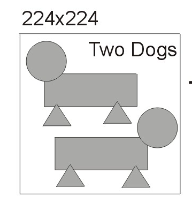

**Characteristics**

* Default shape =  [batch_size, width, height, colour_channels]
* batch_size = is the number of images (in this case) that i want to test for each training steps, help the computer to prevent run out of memory
* width = this represent image pixels to the side
* height = this represent a list of 224
* Image shape = [32, 224, 224, 3]

In [ ]:
import numpy as np

# Crear un tensor de ejemplo con la forma [32, 224, 224, 3]
batch_size = 32
width = 224
height = 224
channels = 3

# Crear un tensor lleno de ceros para representar las imágenes
tensor = np.zeros((batch_size, width, height, channels))

# Verificar la forma del tensor
print(tensor[0][0][0])

[0. 0. 0.]


### Architecture

* Input Layer = Conv2D + input_shape = Takes in target images and preprocesses them for furter layers
* Convolutional Layer = Conv2D + activation = Extract/Learns the most important features from target images
* Hidden activation = Adds non-linearity to learned features (ReLu) in the Convolutional layer
* Pool Layer = MaxPool2D = Reduces the dimensionality of learned image features
* Fully connected layer = Further refines learned features from convolution layers
* Output layer = Takes learned features and outputs them in shpe of target label
* Output activation = Adds non-linearities to output layer (sigmoid)


## **Get Data**

The images we're working with are from the Food101 datasets from kaggle, but we are working with just pizza and steak to learn

### Import the Data from zipfile

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-02-12 17:56:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 142.251.162.207, 173.194.211.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   160MB/s    in 0.7s    

2024-02-12 17:56:56 (160 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

### Inspect the Data

* becoming one with the data
* visualize, visualize, visualize

In [ ]:
!ls pizza_steak/train/pizza/34* # just some images that have 34 on it

pizza_steak/train/pizza/3401720.jpg  pizza_steak/train/pizza/34632.jpg
pizza_steak/train/pizza/3401767.jpg  pizza_steak/train/pizza/3464027.jpg
pizza_steak/train/pizza/340814.jpg   pizza_steak/train/pizza/3464858.jpg
pizza_steak/train/pizza/3425999.jpg  pizza_steak/train/pizza/3473991.jpg
pizza_steak/train/pizza/3426946.jpg  pizza_steak/train/pizza/3475936.jpg
pizza_steak/train/pizza/3427699.jpg  pizza_steak/train/pizza/3478964.jpg
pizza_steak/train/pizza/3434372.jpg  pizza_steak/train/pizza/3479875.jpg
pizza_steak/train/pizza/3441394.jpg  pizza_steak/train/pizza/3479936.jpg
pizza_steak/train/pizza/3443136.jpg  pizza_steak/train/pizza/3484590.jpg
pizza_steak/train/pizza/3456440.jpg  pizza_steak/train/pizza/3493457.jpg
pizza_steak/train/pizza/3462250.jpg  pizza_steak/train/pizza/349946.jpg


In [ ]:
import os
# How many images have this folders
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

#### Visualize data

In [ ]:
import pathlib
import numpy as np

# Get the classnames programatically
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Store the folder inside train and save the string into a list
class_names

array([], dtype=float64)

In [ ]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(dir, classes):
  # Set up the target directories
  target_folder = dir+'/'+classes
  # Get random
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the imahe and plot it using matplotlib
  img  = mpimg.imread(target_folder + '/'+ random_image[0])

  # Plot
  plt.imshow(img)
  plt.title(classes)
  plt.axis('off');

  print(f'Image Shape: {img.shape}')

  return img

Image Shape: (512, 512, 3)


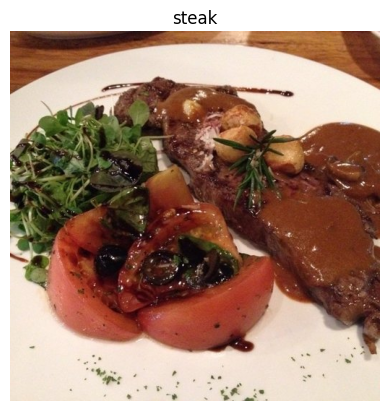

In [ ]:
# View a random image from the data set
img = view_random_image('pizza_steak/train', 'steak')

## Normalize the Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# Preprocess data 9get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set the path to our dir
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary', seed = 42) #Target size, redimension the image to fit in 224 pixels x 224 pixels

valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary', seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Build the Model

In [ ]:
# Build the CNN model (same as the Tiny VGG )
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the CNN
model1.compile(loss='binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics= ['accuracy'])

# Fit the model
history_1 = model1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data =  valid_data, validation_steps  = len(valid_data))

Epoch 1/5
47/47 [==============================] - 103s 2s/step - loss: 0.5545 - accuracy: 0.7033 - val_loss: 0.3782 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 111s 2s/step - loss: 0.4260 - accuracy: 0.8087 - val_loss: 0.3414 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 110s 2s/step - loss: 0.3910 - accuracy: 0.8340 - val_loss: 0.3146 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 109s 2s/step - loss: 0.3563 - accuracy: 0.8513 - val_loss: 0.3115 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 112s 2s/step - loss: 0.3255 - accuracy: 0.8647 - val_loss: 0.3612 - val_accuracy: 0.8580


https://poloclub.github.io/cnn-explainer

Course Conclusion:

* More parameters it's not equal to a good accuracy in all the cases
* CNN reduce the number of parameters needed to imporve the model with significatly less parameters


# Now we do it better

## Preprocessing Data

In [ ]:
# Create train and test data generators and rescale the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# Preprocess data 9get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1/255.)
valid_datagen = ImageDataGenerator(rescale = 1/255.)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary', seed = 42) #Target size, redimension the image to fit in 224 pixels x 224 pixels

valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary', seed = 42)



FileNotFoundError: [Errno 2] No such file or directory: '/content/pizza_steak/train'

In [ ]:
# Get a sample of a train data batch
images, labels  = train_data.next()
len(images), len(labels)

In [ ]:
# How many batches are there
len(train_data)

In [ ]:
# Get the shape of the train_data of the images only
images.shape


## Build the Model

In [ ]:
# First import all
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

* Filters: Number of Sliding windows (CNN) going across all the inputshape
* Kernel_size: The size of the sliding windows going across the input shape (3x3)
* Strides: The size of the step the sliding windows takes in output
* Padding: When the kernel extends beyond the activation map. Padding conserves data at the borders of activation maps

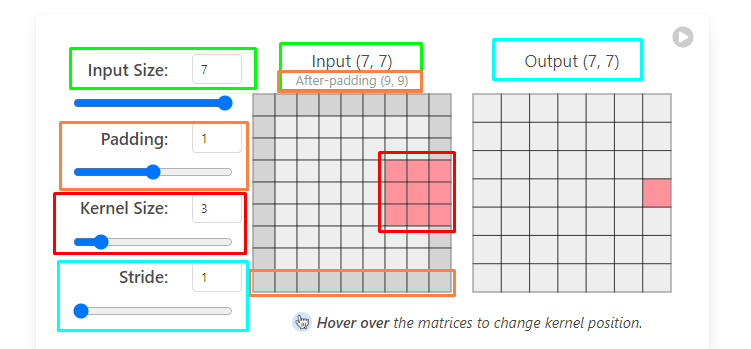

In [ ]:
# Build the CNN model (same as the Tiny VGG )
model2 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = "valid", activation = 'relu', input_shape = (224,224,3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the CNN
model2.compile(loss='binary_crossentropy',
               optimizer = Adam(),
               metrics= ['accuracy'])



In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(valid_data)

(47, 16)

In [ ]:
# Fit the model
history_2 = model2.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data), # Each epoch is taking 47 steps beacause this is the result of the batch size (32)
                       validation_data =  valid_data,
                       validation_steps  = len(valid_data)) # Each epoch is taking 16 steps beacause this is the result of the batch size (32)

Epoch 1/5
47/47 [==============================] - 13s 162ms/step - loss: 1.0033 - accuracy: 0.6787 - val_loss: 0.4505 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4328 - accuracy: 0.8080 - val_loss: 0.3955 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3252 - accuracy: 0.8707 - val_loss: 0.4166 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.1720 - accuracy: 0.9447 - val_loss: 0.4424 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.0664 - accuracy: 0.9853 - val_loss: 0.6520 - val_accuracy: 0.7960


## Evaluate the Model

In [ ]:
model2.evaluate(valid_data)

16/16 [==============================] - 23s 1s/step - loss: 0.4182 - accuracy: 0.8180


[0.41824066638946533, 0.8180000185966492]

### Loss Curves

In [ ]:
import matplotlib.pyplot as plt
# plot the validation and traning curves separately
def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'Training_loss')
  plt.plot(epochs, val_loss, label = 'Val_loss')
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'Training_acc')
  plt.plot(epochs, val_accuracy, label = 'Val_acc')
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

In [ ]:
# Check the loss and accuracy
plot_loss(history_2)

NameError: name 'history_2' is not defined

### Overfitting


* Generalization: The ability for a machine learning model to perform well on data it hasn't seed before
* Overfitting: it;s learning the patterns in the training dataset "too well" and this the model ability to generalize to unseeen data will be disminished

### Adjust the model parameters


Ways to induce overfitting
* Increase the number of conv layers.
* Increase the number of conv filters.
* Add anotger dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Build the CNN model (same as the Tiny VGG )
model3 = tf.keras.models.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2, padding = "valid"),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the CNN
model3.compile(loss='binary_crossentropy',
               optimizer = Adam(),
               metrics= ['accuracy'])

# Fit the model
history_3 = model3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data =  valid_data, validation_steps  = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 136ms/step - loss: 0.6155 - accuracy: 0.6420 - val_loss: 0.4371 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4796 - accuracy: 0.7787 - val_loss: 0.4298 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4298 - accuracy: 0.8073 - val_loss: 0.4574 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3832 - accuracy: 0.8340 - val_loss: 0.3813 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3340 - accuracy: 0.8553 - val_loss: 0.3375 - val_accuracy: 0.8440


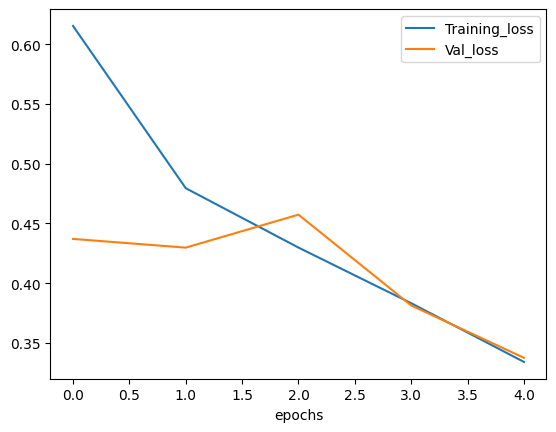

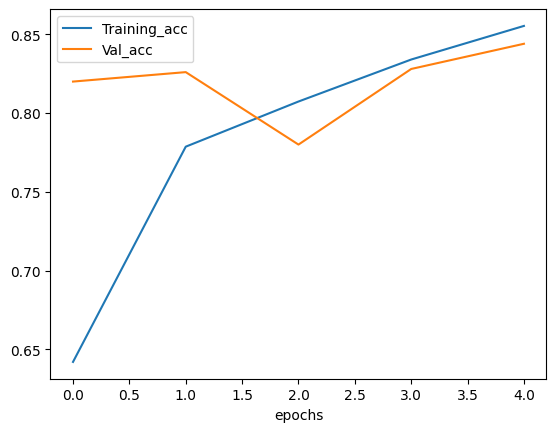

In [ ]:
plot_loss(history_3)


# Start Again

In [ ]:
import zipfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-02-12 18:48:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M  94.9MB/s    in 1.1s    

2024-02-12 18:48:34 (94.9 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Data Augmentation



> Data augementation is the processs of altering our training data, leading it to have more diveristy and in turn allowing our models to learn more generalizable patterns. How:
* rotation, flip, mirror, cropping





In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# Preprocess data 9get all of the pixel values between 0 and 1
train_datagen_augmented = ImageDataGenerator(rescale = 1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#Import data from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary', shuffle = True) #Target size, redimension the image to fit in 224 pixels x 224 pixels

valid_data = test_datagen.flow_from_directory(test_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary')

train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224), class_mode = 'binary', shuffle = True)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


**NOTE:** Data Augmentation is usally only on training data

### Build the Model and train with augmented data

In [ ]:
# Build the CNN model (same as the Tiny VGG )
model4 = tf.keras.models.Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the CNN
model4.compile(loss='binary_crossentropy',
               optimizer = Adam(),
               metrics= ['accuracy'])

# Fit the model
history_4 = model4.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented), validation_data =  valid_data, validation_steps  = len(valid_data))

Epoch 1/5
47/47 [==============================] - 107s 2s/step - loss: 0.6140 - accuracy: 0.6533 - val_loss: 0.4391 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 105s 2s/step - loss: 0.5210 - accuracy: 0.7493 - val_loss: 0.5043 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 107s 2s/step - loss: 0.4944 - accuracy: 0.7707 - val_loss: 0.3546 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 108s 2s/step - loss: 0.4640 - accuracy: 0.7947 - val_loss: 0.3328 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 107s 2s/step - loss: 0.4510 - accuracy: 0.8047 - val_loss: 0.3268 - val_accuracy: 0.8760


### Evaluate our augmented data model

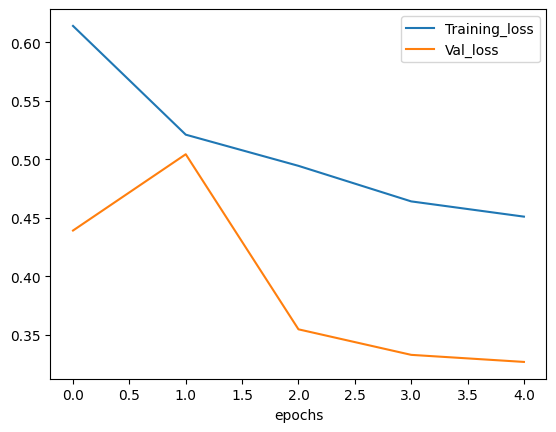

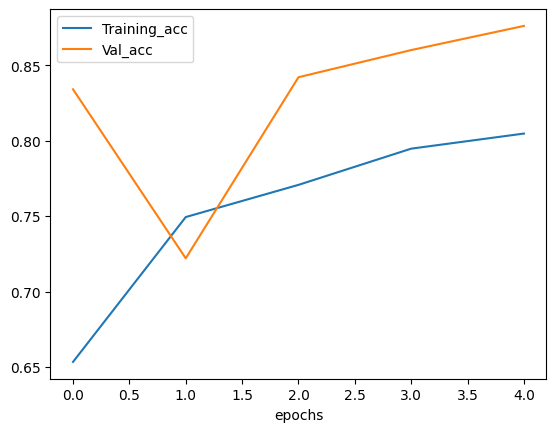

In [ ]:
plot_loss(history_4)

**We succsesfully decrease our loss curves**

## Making a prediction

--2024-02-12 19:07:50--  https://images.hola.com/imagenes/cocina/recetas/20230208226048/pizza-pepperoni/1-201-303/pizza-pepperoni-age-t.jpg?tx=w_680
Resolving images.hola.com (images.hola.com)... 151.101.2.92, 151.101.66.92, 151.101.130.92, ...
Connecting to images.hola.com (images.hola.com)|151.101.2.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89852 (88K) [image/jpeg]
Saving to: ‘pizza-pepperoni-age-t.jpg?tx=w_680.2’

pizza-pepperoni-age 100%[===================>]  87.75K  --.-KB/s    in 0.003s  

2024-02-12 19:07:50 (30.0 MB/s) - ‘pizza-pepperoni-age-t.jpg?tx=w_680.2’ saved [89852/89852]



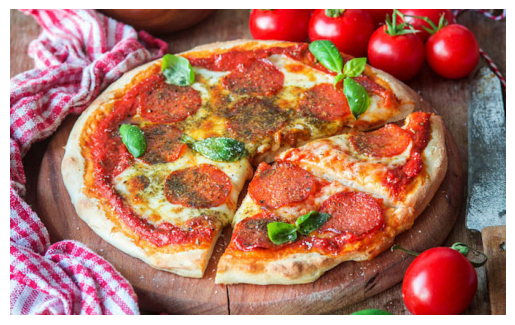

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://images.hola.com/imagenes/cocina/recetas/20230208226048/pizza-pepperoni/1-201-303/pizza-pepperoni-age-t.jpg?tx=w_680
steak = mpimg.imread('03-steak.jpeg')
pizza = mpimg.imread("pizza-pepperoni-age-t.jpg")
plt.imshow(pizza)
plt.axis(False);

### Preprocessed our image

In [ ]:
def load_image(filename, img_shape = 224):
  # Read the image
  img = tf.io.read_file(filename)

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image to 0 - 1
  img = img/225.
  return img

In [ ]:
pizza = load_image("pizza-pepperoni-age-t.jpg", 224)

In [ ]:
pred = model4.predict(tf.expand_dims(pizza, axis = 0))
pred

1/1 [==============================] - 0s 33ms/step


array([[0.01378289]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
# prompt: crea una funcion que plotte mi imagen junto con la prediccion de pred_class

def plot_image_with_prediction(model, filename, class_names = class_names):
  #import the target image and preprocces it
  img = load_image(filename)
  # Make the prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)



1/1 [==============================] - 0s 32ms/step


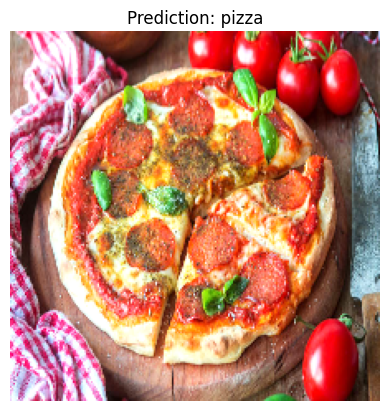

In [ ]:
plot_image_with_prediction(model4, 'pizza-pepperoni-age-t.jpg')

let's try another image

--2024-02-12 19:16:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.01s   

2024-02-12 19:16:11 (141 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

1/1 [==============================] - 0s 54ms/step


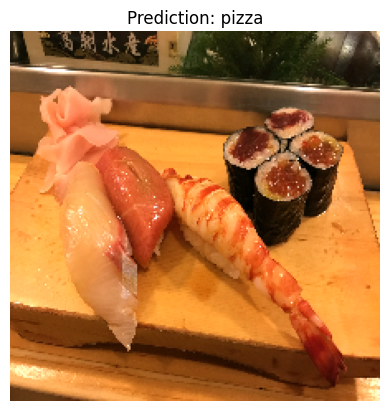

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
plot_image_with_prediction(model4, "03-sushi.jpeg")

In [ ]:
pizza = load_image("03-sushi.jpeg", 224)
pred = model4.predict(tf.expand_dims(pizza, axis = 0))
pred

1/1 [==============================] - 0s 33ms/step


array([[0.06766238]], dtype=float32)